Data Prepration and EDA for meta Learning task:
solving the problem with Traffic_complesity_scores file:

In this task, we undertook a comprehensive process to load, merge, clean, and perform Exploratory Data Analysis (EDA) on an Excel file containing traffic complexity scores, which was organized across multiple sheets. Here's a breakdown of the steps and methodologies applied:

Loading and Merging Data
- Excel Loading: We began by loading an Excel file that contained multiple sheets, each potentially holding a part of the traffic complexity data.
- Sheet Iteration: We iterated through each sheet, loading its contents into a pandas DataFrame. Given the presence of metadata and headers in the initial rows, we skipped a number of rows to focus on the actual data.
- **Merging:** The DataFrames from each sheet were combined into a single DataFrame to create a unified dataset. This was done vertically, appending each sheet's data to the end of the merged DataFrame.

### Data Cleaning
- **Thresholding:** We applied a threshold to remove columns where the majority of values were missing, focusing on columns with significant data presence.
- **Type Filtering:** We filtered out columns that primarily contained non-numeric data, assuming that numeric columns would be more relevant for the analysis of traffic complexity scores.
- **Row Exclusion:** The initial rows of the merged DataFrame, which included mixed types of data such as metadata, were excluded from further numerical analysis.

### Exploratory Data Analysis (EDA)
- **Statistical Summary:** We generated a statistical summary of the numerical columns in the cleaned dataset, providing insights into counts, means, standard deviations, and quartiles, helping us understand the distribution of the data.
- **Correlation Analysis:** We explored the correlations between different numerical columns to identify potential relationships and dependencies between various metrics of traffic complexity.

### Insights and Observations
- **Data Diversity:** The merging process revealed a diverse range of columns across different sheets, leading to a wide array of metrics in the unified dataset.
- **Strong Correlations:** Some columns exhibited strong correlations, suggesting that certain metrics of traffic complexity were closely related.
- **Constant Values:** A column with a constant value was identified, which might not provide useful variability for analysis and could be considered for removal in further steps.

### Next Steps
- **Further Cleaning:** The presence of a constant column suggests a need for further cleaning to refine the dataset for analysis.
- **Deep Dive into Specific Metrics:** The strong correlations between certain columns warrant a more detailed analysis to uncover patterns or trends within specific metrics of traffic complexity.
- **Visualization:** To complement the numerical analysis, visualizations such as histograms, scatter plots, and correlation heatmaps could provide graphical insights into the data distribution and relationships.

This task demonstrated a methodical approach to handling complex Excel data, preparing it for insightful analysis and potential application in traffic complexity studies or predictive modeling.

In [9]:
import pandas as pd

# Load the Excel file and list all sheet names
xl_file_path = 'C:/Users/Admin/Desktop/ADAI_Proj/data prep/Traffic_Complexity_Scores_1.xlsm'  # Update  path
xl = pd.ExcelFile(xl_file_path, engine='openpyxl')
sheet_names = xl.sheet_names

# Merge data from all sheets
merged_df = pd.DataFrame()
for sheet in sheet_names:
    df = pd.read_excel(xl, sheet_name=sheet, skiprows=10)
    merged_df = pd.concat([merged_df, df], ignore_index=True)

# Save the merged DataFrame to a CSV file
csv_file_path = 'C:/Users/Admin/Desktop/ADAI_Proj/data prep/Merged_Traffic_Complexity_Scores.csv'  # Update this path
merged_df.to_csv(csv_file_path, index=False)




In [10]:
import pandas as pd

# Save the merged DataFrame to a CSV file
csv_file_path = 'C:/Users/Admin/Desktop/ADAI_Proj/data prep/Merged_Traffic_Complexity_Scores.csv'  # Update  path
merged_df.to_csv(csv_file_path, index=False)
# Load the merged CSV file
merged_data_df = pd.read_csv(csv_file_path)

# Data Cleaning: Focus on columns with significant numerical data
threshold = len(merged_data_df) * 0.5  # 50% threshold for non-null values
cleaned_df = merged_data_df.dropna(thresh=threshold, axis=1)

# Remove columns with primarily non-numeric data
for column in cleaned_df.columns:
    if cleaned_df[column][5:].apply(lambda x: isinstance(x, str)).mean() > 0.5:
        cleaned_df = cleaned_df.drop(column, axis=1)

# Further Cleaning: Exclude initial non-numeric rows and convert columns to numeric
numerical_data_df = cleaned_df[5:].apply(pd.to_numeric, errors='coerce').dropna().reset_index(drop=True)

# EDA: Statistical Summary and Correlation Matrix
statistical_summary = numerical_data_df.describe()
correlation_matrix = numerical_data_df.corr()

# Display results
print(statistical_summary)
print(correlation_matrix)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8924\1842192847.py:7: DtypeWarning: Columns (1,2,3,4,5,17,24,31,35) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_data_df = pd.read_csv(csv_file_path)


                  1          2014  1563.04916666667  171.269166666667  \
count  41638.000000  41638.000000      41638.000000      41638.000000   
mean       6.523224   2015.001153        912.997003        124.119626   
std        3.448380      0.816643       1154.224676        207.809505   
min        1.000000   2014.000000          6.245833          0.032500   
25%        4.000000   2014.000000        181.136667         12.049375   
50%        7.000000   2015.000000        508.956667         41.114167   
75%       10.000000   2016.000000        927.708542        120.704792   
max       12.000000   2016.000000       7087.425000       1598.509167   

       37.9808333333333  101.260833333333  33.7341666666667           3.6  
count      41638.000000      41638.000000      41638.000000  4.163800e+04  
mean          22.974802         56.935707         22.534779  3.600000e+00  
std           43.811564         93.867178         39.039931  4.440945e-16  
min            0.000000          0.002

In [11]:
# Print all column names of the DataFrame
print("Column Names:", numerical_data_df.columns.tolist())

# Check for NaN values in each column
nan_values = numerical_data_df.isna().sum()
print("NaN Values in Each Column:\n", nan_values)


Column Names: ['1', '2014', '1563.04916666667', '171.269166666667', '37.9808333333333', '101.260833333333', '33.7341666666667', '3.6']
NaN Values in Each Column:
 1                   0
2014                0
1563.04916666667    0
171.269166666667    0
37.9808333333333    0
101.260833333333    0
33.7341666666667    0
3.6                 0
dtype: int64


In [13]:
import pandas as pd



# Load the dataset
atc_df = pd.read_excel('C:/Users/Admin/Desktop/ADAI_Proj/data prep/ATC_1_traf_complexity.xlsx', engine='openpyxl')
# Display the first few rows of the DataFrame
print(atc_df.head())

# Display a concise summary of the DataFrame
atc_df.info()


   YEAR  MONTH_NUM MONTH_MON   FLT_DATE           ENTITY_NAME ENTITY_TYPE  \
0  2014          1       JAN 2014-01-01                ANS CR  ANSP (AUA)   
1  2014          1       JAN 2014-01-01                ARMATS  ANSP (AUA)   
2  2014          1       JAN 2014-01-01            Albcontrol  ANSP (AUA)   
3  2014          1       JAN 2014-01-01        Austro Control  ANSP (AUA)   
4  2014          1       JAN 2014-01-01  Avinor (Continental)  ANSP (AUA)   

   CPLX_FLIGHT_HRS  CPLX_INTER  VERTICAL_INTER_HRS  HORIZ_INTER_HRS  \
0       343.765833   42.295833            4.550000        20.610000   
1        30.133333    1.040833            0.028333         0.353333   
2        61.370000    3.780000            0.102500         1.278333   
3       342.625000   30.108333            4.885833        16.687500   
4       395.532500   11.073333            2.756667         5.279167   

   SPEED_INTER_HRS  BADA_VERSION  
0         6.075000           3.6  
1         0.116667           3.6  
2    

In [14]:
null_values = df.isna().sum()
print(null_values)

YEAR                  0
MONTH_NUM             0
MONTH_MON             0
FLT_DATE              0
ENTITY_NAME           0
ENTITY_TYPE           0
CPLX_FLIGHT_HRS       0
CPLX_INTER            0
VERTICAL_INTER_HRS    0
HORIZ_INTER_HRS       0
SPEED_INTER_HRS       0
BADA_VERSION          0
dtype: int64


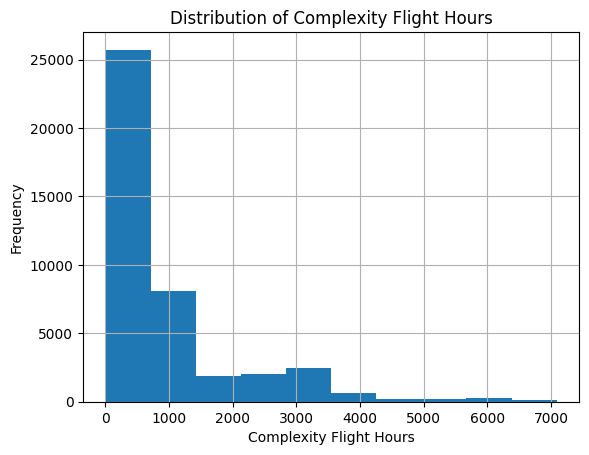

In [15]:

# Visualizations: Histograms, scatter plots, etc., using matplotlib or seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram for 'CPLX_FLIGHT_HRS'
df['CPLX_FLIGHT_HRS'].hist()
plt.title('Distribution of Complexity Flight Hours')
plt.xlabel('Complexity Flight Hours')
plt.ylabel('Frequency')
plt.show()


In [40]:
import pandas as pd

# Load the dataset
file_path ='C:/Users/Admin/Desktop/ADAI_Proj/data prep/ATC_1_traf_complexity.xlsx' # Update  file path
data = pd.read_excel(file_path)
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])

# Check for rows with NaN values
rows_with_nan = numeric_data.isna().any(axis=1)

# Display rows that contain at least one NaN value
nan_rows_df = numeric_data[rows_with_nan]

print('nanrows: ', nan_rows_df)

# Calculate the percentage of NaN values in each column
nan_percentage = numeric_data.isna().mean() * 100

# Print the percentage of NaN values for each column
print("Percentage of NaN values in each column:")
print(nan_percentage)

# Convert BADA_VERSION to a numeric data type
numeric_data['BADA_VERSION'] = pd.to_numeric(numeric_data['BADA_VERSION'], errors='coerce')

# After conversion, re-check for NaN values and the correlation matrix
nan_percentage_after_conversion = numeric_data['BADA_VERSION'].isna().mean() * 100
correlation_matrix_after_conversion = numeric_data.corr()

# Print the results
print("Percentage of NaN values in BADA_VERSION after conversion:", nan_percentage_after_conversion)
print(correlation_matrix_after_conversion)


# Compute the correlation matrix on numeric data
correlation_matrix = numeric_data.corr()

# Print the correlation matrix
print(correlation_matrix)


import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix Heatmap')
plt.show()
# Checking the variance of BADA_VERSION
bada_version_variance = numeric_data['BADA_VERSION'].var()
print(f"Variance of BADA_VERSION: {bada_version_variance}")



nanrows:  Empty DataFrame
Columns: [YEAR, MONTH_NUM, CPLX_FLIGHT_HRS, CPLX_INTER, VERTICAL_INTER_HRS, HORIZ_INTER_HRS, SPEED_INTER_HRS, BADA_VERSION]
Index: []
Percentage of NaN values in each column:
YEAR                  0.0
MONTH_NUM             0.0
CPLX_FLIGHT_HRS       0.0
CPLX_INTER            0.0
VERTICAL_INTER_HRS    0.0
HORIZ_INTER_HRS       0.0
SPEED_INTER_HRS       0.0
BADA_VERSION          0.0
dtype: float64
Percentage of NaN values in BADA_VERSION after conversion: 0.0
                        YEAR  MONTH_NUM  CPLX_FLIGHT_HRS  CPLX_INTER  \
YEAR                1.000000  -0.001465         0.012666    0.017979   
MONTH_NUM          -0.001465   1.000000         0.032414    0.042375   
CPLX_FLIGHT_HRS     0.012666   0.032414         1.000000    0.959627   
CPLX_INTER          0.017979   0.042375         0.959627    1.000000   
VERTICAL_INTER_HRS  0.015312   0.029197         0.858454    0.885106   
HORIZ_INTER_HRS     0.024802   0.045780         0.937615    0.971388   
SPEED_INT

The BADA_VERSION column seems to be referencing the version number of BADA, which is an acronym for Base of Aircraft Data. BADA is a model developed by EUROCONTROL (the European Organisation for the Safety of Air Navigation) that provides a consistent and accurate method for representing aircraft performance profiles during various phases of flight.

In the context of our dataset, every row has the same value for BADA_VERSION, which suggests that the aircraft performance data present in the dataset are all based on the same version (3.6) of the BADA model. This column serves as metadata rather than as a variable that would vary from one observation to the next. It does not provide analytical value in statistical models or correlations within the dataset since it is constant.

In [41]:


# Drop the 'BADA_VERSION' column
data = numeric_data.drop('BADA_VERSION', axis=1)

# Now 'data' is the fresh DataFrame without the 'BADA_VERSION' column
# Let's take a look at the first few rows of the DataFrame
print(data.head())


   YEAR  MONTH_NUM  CPLX_FLIGHT_HRS  CPLX_INTER  VERTICAL_INTER_HRS  \
0  2014          1       343.765833   42.295833            4.550000   
1  2014          1        30.133333    1.040833            0.028333   
2  2014          1        61.370000    3.780000            0.102500   
3  2014          1       342.625000   30.108333            4.885833   
4  2014          1       395.532500   11.073333            2.756667   

   HORIZ_INTER_HRS  SPEED_INTER_HRS  
0        20.610000         6.075000  
1         0.353333         0.116667  
2         1.278333         0.119167  
3        16.687500         6.057500  
4         5.279167         2.238333  


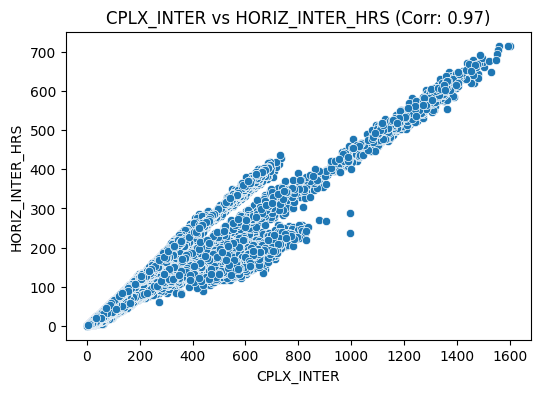

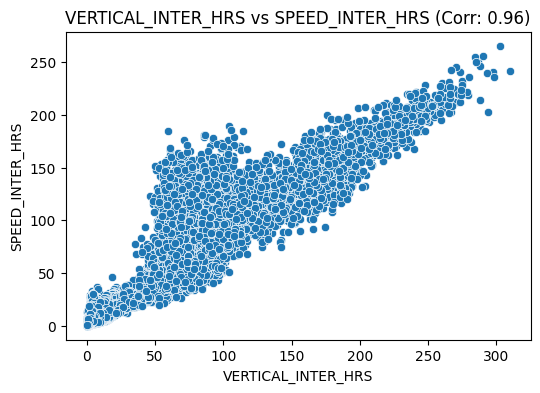

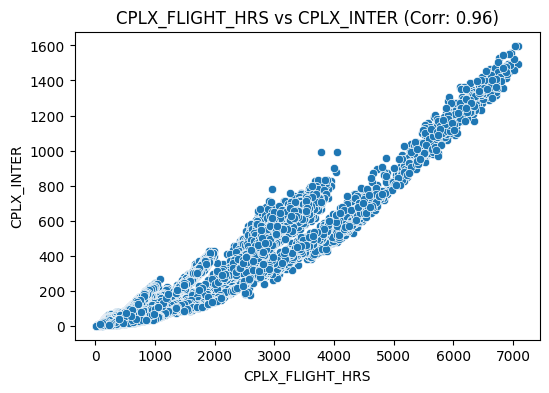

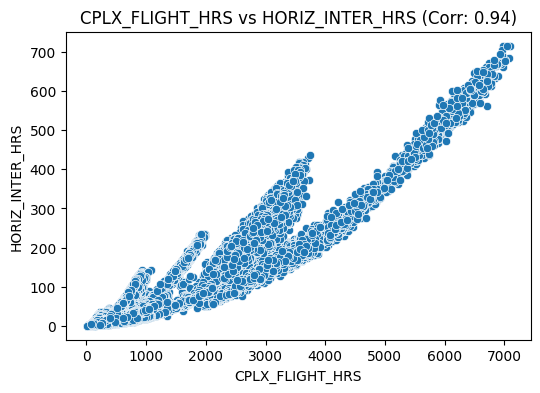

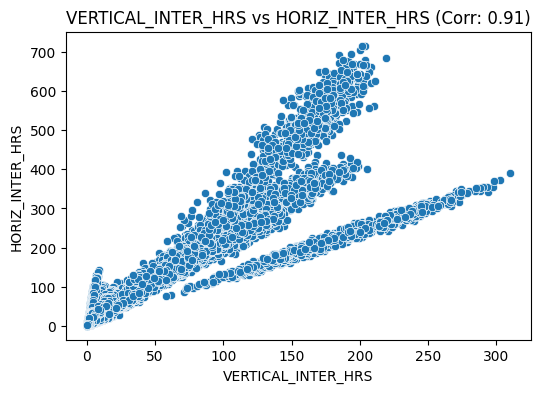

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

strong_corr_matrix = correlation_matrix.abs().where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
strong_corrs = strong_corr_matrix.stack().reset_index()
strong_corrs.columns = ['CPLX_FLIGHT_HRS', 'CPLX_INTER', 'Correlation']
strong_corrs = strong_corrs[strong_corrs['Correlation'] > 0.7]


# Plotting only a few top strong correlations due to performance considerations
top_strong_corrs = strong_corrs.sort_values('Correlation', ascending=False).head(5)

for index, row in top_strong_corrs.iterrows():
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=numeric_data, x=row['CPLX_FLIGHT_HRS'], y=row['CPLX_INTER'])
    plt.title(f"{row['CPLX_FLIGHT_HRS']} vs {row['CPLX_INTER']} (Corr: {row['Correlation']:.2f})")
    plt.show()


In [49]:


# Load  dataset
file_path = 'C:/Users/Admin/Desktop/ADAI_Proj/data prep/ATC_1_traf_complexity.xlsx'  # Update  actual path
data = pd.read_excel(file_path)

# Convert 'FLT_DATE' to a datetime column if it's not already in datetime format
data['FLT_DATE'] = pd.to_datetime(data['FLT_DATE'])


# Now, add the 'FLT_DATE' column to  numeric dataframe
numeric_data_with_date = numeric_data.copy()
numeric_data_with_date['FLT_DATE'] = data['FLT_DATE']

# Print the updated dataframe
print(numeric_data_with_date.head())

# Drop the 'BADA_VERSION' column
data = numeric_data.drop('BADA_VERSION', axis=1)

print('Final dataframe:',data.head())


   YEAR  MONTH_NUM  CPLX_FLIGHT_HRS  CPLX_INTER  VERTICAL_INTER_HRS  \
0  2014          1       343.765833   42.295833            4.550000   
1  2014          1        30.133333    1.040833            0.028333   
2  2014          1        61.370000    3.780000            0.102500   
3  2014          1       342.625000   30.108333            4.885833   
4  2014          1       395.532500   11.073333            2.756667   

   HORIZ_INTER_HRS  SPEED_INTER_HRS  BADA_VERSION   FLT_DATE  
0        20.610000         6.075000           3.6 2014-01-01  
1         0.353333         0.116667           3.6 2014-01-01  
2         1.278333         0.119167           3.6 2014-01-01  
3        16.687500         6.057500           3.6 2014-01-01  
4         5.279167         2.238333           3.6 2014-01-01  
Final dataframe:    YEAR  MONTH_NUM  CPLX_FLIGHT_HRS  CPLX_INTER  VERTICAL_INTER_HRS  \
0  2014          1       343.765833   42.295833            4.550000   
1  2014          1        30.133333 

In [50]:
import pandas as pd

# Load dataset
file_path = 'C:/Users/Admin/Desktop/ADAI_Proj/data prep/ATC_1_traf_complexity.xlsx'  # Update  path
data = pd.read_excel(file_path)

# Convert 'FLT_DATE' to a datetime column if it's not already in datetime format
data['FLT_DATE'] = pd.to_datetime(data['FLT_DATE'])

# Drop the 'BADA_VERSION' column
data = data.drop('BADA_VERSION', axis=1)


# It's important to make sure 'numeric_data' is defined before this step, and it should not include 'FLT_DATE' before copying
numeric_data_with_date = data.select_dtypes(include=[np.number]).copy()
numeric_data_with_date['FLT_DATE'] = data['FLT_DATE']

print('Final dataframe:', numeric_data_with_date.head())


Final dataframe:    YEAR  MONTH_NUM  CPLX_FLIGHT_HRS  CPLX_INTER  VERTICAL_INTER_HRS  \
0  2014          1       343.765833   42.295833            4.550000   
1  2014          1        30.133333    1.040833            0.028333   
2  2014          1        61.370000    3.780000            0.102500   
3  2014          1       342.625000   30.108333            4.885833   
4  2014          1       395.532500   11.073333            2.756667   

   HORIZ_INTER_HRS  SPEED_INTER_HRS   FLT_DATE  
0        20.610000         6.075000 2014-01-01  
1         0.353333         0.116667 2014-01-01  
2         1.278333         0.119167 2014-01-01  
3        16.687500         6.057500 2014-01-01  
4         5.279167         2.238333 2014-01-01  


In [52]:
#  'numeric_data_with_date' is  final DataFrame after including 'FLT_DATE' and dropping 'BADA_VERSION'
output_csv_path = 'C:/Users/Admin/Desktop/ADAI_Proj/data prep/final_dataframe_trfcomplexity.csv'  # Change  path

# Save the DataFrame to CSV
numeric_data_with_date.to_csv(output_csv_path, index=False)
print("clened csv for Metalearning:")

print(f"The final dataframe has been saved to {output_csv_path}")


clened csv for Metalearning:
The final dataframe has been saved to C:/Users/Admin/Desktop/ADAI_Proj/data prep/final_dataframe_trfcomplexity.csv


Exploring ACAS dataset:
"ACAS" typically stands for "Airborne Collision Avoidance System." It's a system used in aviation to reduce the risk of mid-air collisions between aircraft. It monitors the airspace around an aircraft for other aircraft equipped with a responding transponder and issues pilot advisories when the potential for a collision is detected.
Meta data:

Date (e.g., '2023-05-01'): This column represents the date of the recorded event.

Time (e.g., '00:03:32.0'): This column shows the time at which the event was recorded.

Aircraft Identifier (e.g., 'a287a4'): A unique identifier for the aircraft, possibly an ICAO hex code used for ADS-B (Automatic Dependent Surveillance-Broadcast) identification.

DF (e.g., 'DF:'): Data Format indicator, which in the context of ACAS or ADS-B, could specify the format of the surveillance data being transmitted or received.

Byte Count (e.g., '17'): This column might indicate the length of the data message in terms of bytes.

Data Bytes (e.g., 'bytes:'): The label for the actual data transmitted or received, represented in a hexadecimal format.

Latitude (e.g., '34.047096'): Geographic latitude of the aircraft's position at the time of the event.

Longitude (e.g., '-117.756901'): Geographic longitude of the aircraft's position.

Altitude (e.g., '5500 ft'): Altitude of the aircraft in feet.

Vertical Speed (e.g., '2880 fpm'): Rate of climb or descent in feet per minute.

ARA (e.g., 'ARA:'): ACAS Resolution Advisory. This could be a code representing the type of advisory issued by the ACAS to avoid potential conflicts.

RAT (e.g., 'RAT:'): Resolution Advisory Terminated. A flag indicating whether the advisory has been terminated (0 may indicate no, 1 may indicate yes).

MTE (e.g., 'MTE:'): Possibly related to a Maximum Threat Estimate or similar metric in the context of collision avoidance.

RAC (e.g., 'RAC:'): Resolution Advisory Complement. This could be additional information or codes related to the advisory issued.

RA (e.g., 'RA: Level Off'): Specific Resolution Advisory action recommended, such as "Level Off" to maintain current altitude.

In [55]:
import pandas as pd

acas_df = pd.read_csv('acas.csv/acas.csv')
# Display the first few rows
print(acas_df.head())

# Display the shape of the DataFrame
print("Shape of the DataFrame:", acas_df.shape)
# Display a concise summary of the DataFrame
acas_df.info()
# checking colums
print(acas_df.columns.tolist())



   2023-05-01  00:03:32.0   a287a4  DF:  17  bytes:  E2E000089004C0  \
0  2023-05-01  00:03:32.8   a287a4  DF:  17  bytes:  E2E000089004C0   
1  2023-05-01  00:03:33.5   a287a4  DF:  17  bytes:  E2E00008900481   
2  2023-05-01  00:03:34.4   a287a4  DF:  17  bytes:  E2E00008900481   
3  2023-05-01  00:03:35.3   a287a4  DF:  17  bytes:  E2E00008900481   
4  2023-05-01  00:03:36.3   a287a4  DF:  17  bytes:  E2E00008900442   

     34.047096  -117.756901   5500  ...  1110000  RAT:  0  MTE:  0.1  RAC:  \
0    34.045886  -117.757931   5550  ...  1110000  RAT:  0  MTE:    0  RAC:   
1    34.045374  -117.758331   5600  ...  1110000  RAT:  0  MTE:    0  RAC:   
2    34.044388  -117.759088   5625  ...  1110000  RAT:  0  MTE:    0  RAC:   
3    34.043326  -117.759819   5675  ...  1110000  RAT:  0  MTE:    0  RAC:   
4    34.042236  -117.760601   5700  ...  1110000  RAT:  0  MTE:    0  RAC:   

   0000               RA: Level Off Unnamed: 23  
0     0               RA: Level Off         NaN  
1   

In [56]:
# Calculate the percentage of null/NaN values in each column
null_percentage = acas_df.isna().mean() * 100

# Print the percentage of null/NaN values for each column
print(null_percentage)

2023-05-01          0.0
00:03:32.0          0.0
 a287a4             0.0
DF:                 0.0
17                  0.0
bytes:              0.0
E2E000089004C0      0.0
  34.047096         0.0
-117.756901         0.0
 5500               0.0
ft                  0.0
 2880               0.0
fpm                 0.0
ARA:                0.0
1110000             0.0
RAT:                0.0
0                   0.0
MTE:                0.0
0.1                 0.0
RAC:                0.0
0000                0.0
                    0.0
 RA: Level Off      0.0
Unnamed: 23       100.0
dtype: float64


In [71]:


import pandas as pd

# Load the uploaded CSV file
file_path = 'acas.csv/acas.csv'  # Chage file path
acas_data = pd.read_csv(file_path)

# Renaming columns based on the provided specifications
column_mapping = {
    '  34.047096': 'Latitude',
    '-117.756901': 'Longitude',
    ' 5500': 'Altitude',
    ' 2880': 'Vertical Speed',  
    'ARA:': 'ARA',
    'RAT:': 'RAT',
    'MTE:': 'MTE',
    'RAC:': 'RAC',
    ' RA: Level Off': 'RA'
}

# Applying the renaming
acas_data_renamed = acas_data.rename(columns=column_mapping)

# Selecting only the relevant columns
relevant_columns = ['Latitude', 'Longitude', 'Altitude', 'Vertical Speed', 'ARA', 'RAT', 'MTE', 'RAC', 'RA']
acas_data_filtered = acas_data_renamed[relevant_columns]

# Identifying the column indexes for 'ARA:', 'RAT:', and 'MTE:'
ara_index = acas_data_filtered.columns.get_loc('ARA')
rat_index = acas_data_filtered.columns.get_loc('RAT')
mte_index = acas_data_filtered.columns.get_loc('MTE')

# Extracting the numeric values from the columns immediately following the labels
acas_data_filtered['ARA_Value'] = acas_data.iloc[:, ara_index + 1]
acas_data_filtered['RAT_Value'] = acas_data.iloc[:, rat_index + 1]
acas_data_filtered['MTE_Value'] = acas_data.iloc[:, mte_index + 1]

acas_data_filtered = acas_data_filtered.drop(['ARA_Value', 'RAT_Value','RAC'], axis=1)

# Final DataFrame with the extracted numeric values
final_df = acas_data_filtered[['Latitude', 'Longitude', 'Altitude', 'Vertical Speed', 'MTE_Value', 'RA']]

print(final_df.head())
final_df.info()



      Latitude    Longitude Altitude Vertical Speed    MTE_Value  \
0    34.045886  -117.757931     5550           2880    34.045886   
1    34.045374  -117.758331     5600           2880    34.045374   
2    34.044388  -117.759088     5625           2880    34.044388   
3    34.043326  -117.759819     5675           2880    34.043326   
4    34.042236  -117.760601     5700           2176    34.042236   

               RA  
0   RA: Level Off  
1   RA: Level Off  
2   RA: Level Off  
3   RA: Level Off  
4   RA: Level Off  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9302 entries, 0 to 9301
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Latitude        9302 non-null   object
 1   Longitude       9302 non-null   object
 2   Altitude        9302 non-null   object
 3   Vertical Speed  9302 non-null   object
 4   MTE_Value       9302 non-null   object
 5   RA              9302 non-null   object
dtypes: objec

C:\Users\Admin\AppData\Local\Temp\ipykernel_8924\2057197817.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acas_data_filtered['ARA_Value'] = acas_data.iloc[:, ara_index + 1]
C:\Users\Admin\AppData\Local\Temp\ipykernel_8924\2057197817.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acas_data_filtered['RAT_Value'] = acas_data.iloc[:, rat_index + 1]
C:\Users\Admin\AppData\Local\Temp\ipykernel_8924\2057197817.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [72]:
# Saving the final DataFrame to a new CSV file
new_file_path = 'C:/Users/Admin/Desktop/ADAI_Proj/data prep/final_acas_data.csv'  # Change this 
final_df.to_csv(new_file_path, index=False)

print(f"The final DataFrame has been saved to '{new_file_path}'.")

The final DataFrame has been saved to 'C:/Users/Admin/Desktop/ADAI_Proj/data prep/final_acas_data.csv'.


In [73]:
import pandas as pd

# Load the CSV file
file_path = 'C:/Users/Admin/Desktop/ADAI_Proj/data prep/final_acas_data.csv'  #  file path
acas_data_final = pd.read_csv(file_path)

# Convert 'Latitude', 'Longitude', 'Altitude', 'Vertical Speed', and 'MTE_Value' to numeric types
# 'errors='coerce'' will convert invalid parsing to NaN
acas_data_final['Latitude'] = pd.to_numeric(acas_data_final['Latitude'], errors='coerce')
acas_data_final['Longitude'] = pd.to_numeric(acas_data_final['Longitude'], errors='coerce')
acas_data_final['Altitude'] = pd.to_numeric(acas_data_final['Altitude'], errors='coerce')
acas_data_final['Vertical Speed'] = pd.to_numeric(acas_data_final['Vertical Speed'], errors='coerce')
acas_data_final['MTE_Value'] = pd.to_numeric(acas_data_final['MTE_Value'], errors='coerce')

# Drop any rows with NaN values to ensure clean data for correlation analysis
acas_data_final_cleaned = acas_data_final.dropna()

# Compute the correlation matrix for the specified numerical columns
correlation_matrix = acas_data_final_cleaned[['Latitude', 'Longitude', 'Altitude', 'Vertical Speed', 'MTE_Value']].corr()

# Display the correlation matrix
print(correlation_matrix)


                Latitude  Longitude  Altitude  Vertical Speed  MTE_Value
Latitude        1.000000   0.104994 -0.019020       -0.040402   1.000000
Longitude       0.104994   1.000000  0.080542       -0.032651   0.104994
Altitude       -0.019020   0.080542  1.000000        0.037159  -0.019020
Vertical Speed -0.040402  -0.032651  0.037159        1.000000  -0.040402
MTE_Value       1.000000   0.104994 -0.019020       -0.040402   1.000000


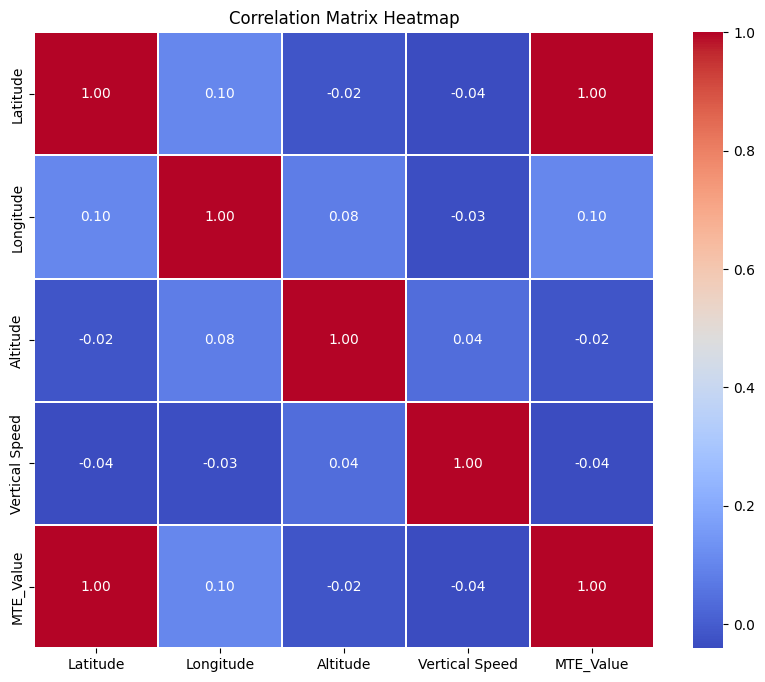

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Correlation Matrix Heatmap')
plt.show()


Now We finally have clean datasets for Meta learning tasks.

Lets start EDA analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed datasets
df_trfcomplexity = pd.read_csv('data prep/meta_learningdata/final_dataframe_trfcomplexity.csv')
df_acas = pd.read_csv('data prep/meta_learningdata/final_acas_data.csv')

# Convert date columns to datetime if necessary
df_trfcomplexity['FLT_DATE'] = pd.to_datetime(df_trfcomplexity['FLT_DATE'])

# Statistical Summary
print(df_trfcomplexity.describe())
print(df_acas.describe())

               YEAR     MONTH_NUM  CPLX_FLIGHT_HRS    CPLX_INTER  \
count  41648.000000  41648.000000     41648.000000  41648.000000   
mean    2015.000912      6.521898       912.865224    124.097742   
min     2014.000000      1.000000         6.245833      0.032500   
25%     2014.000000      4.000000       181.133125     12.046667   
50%     2015.000000      7.000000       508.749167     41.110000   
75%     2016.000000     10.000000       927.611042    120.698542   
max     2016.000000     12.000000      7087.425000   1598.509167   
std        0.816692      3.449028      1154.135597    207.790667   

       VERTICAL_INTER_HRS  HORIZ_INTER_HRS  SPEED_INTER_HRS  \
count        41648.000000     41648.000000     41648.000000   
mean            22.970679        56.926173        22.530651   
min              0.000000         0.002500         0.001667   
25%              1.211667         4.840417         2.172917   
50%              4.891667        17.674583         6.999167   
75%      

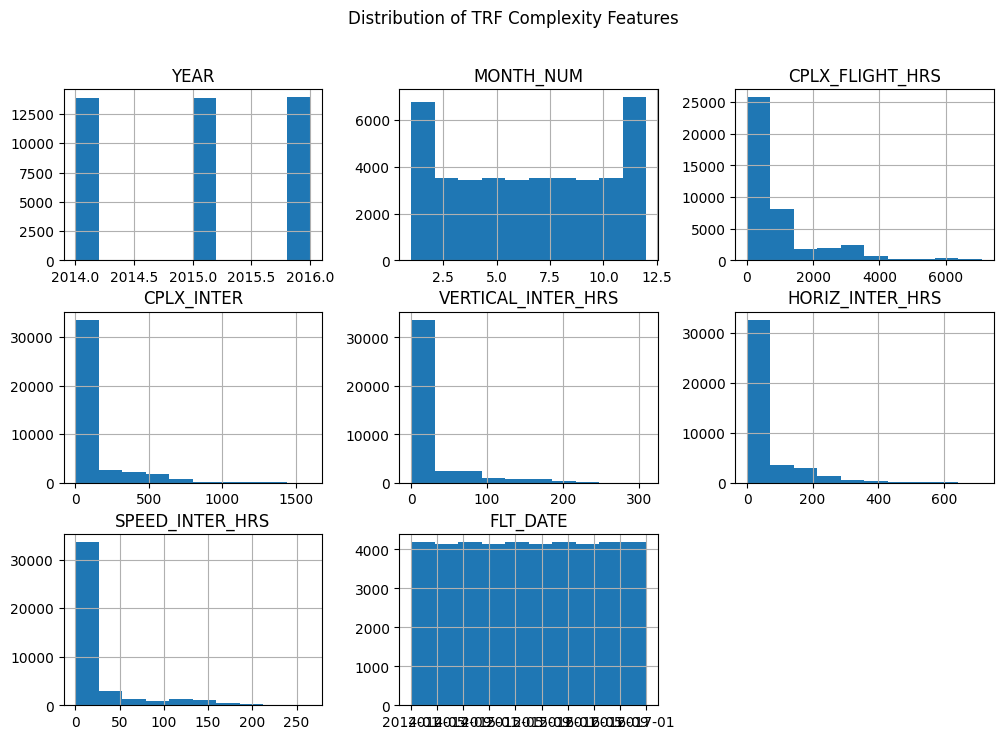

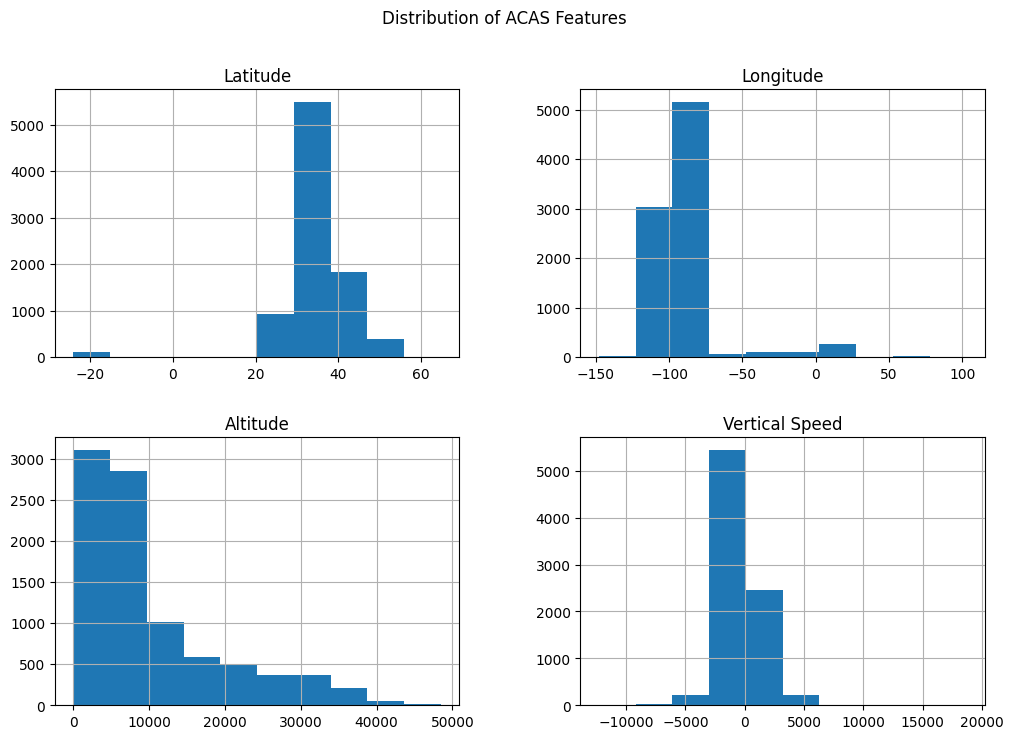

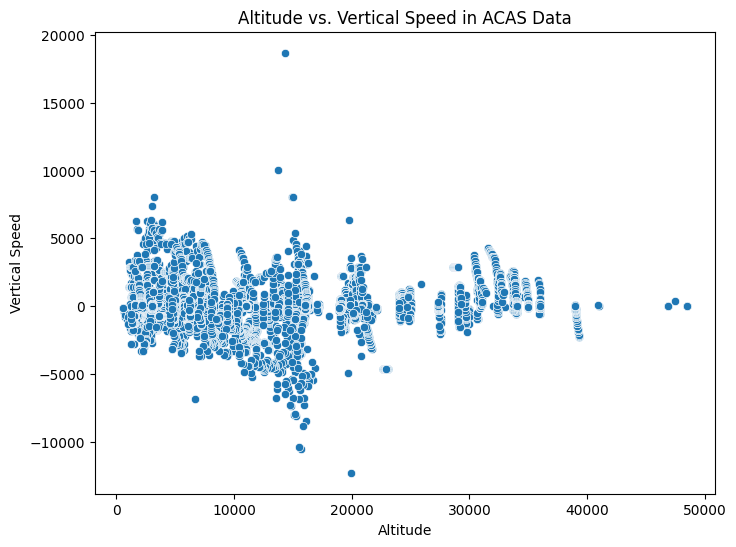

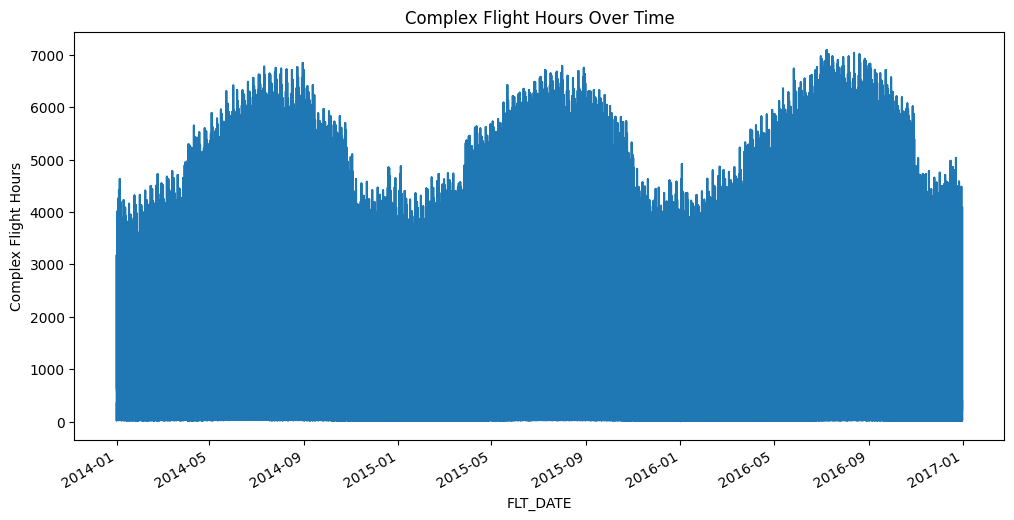

In [3]:
# Visualization
# Histograms for distributions
df_trfcomplexity.hist(figsize=(12, 8))
plt.suptitle('Distribution of TRF Complexity Features')
plt.show()

# Convert 'Latitude', 'Longitude', 'Altitude', and 'Vertical Speed' in df_acas to numeric types
df_acas['Latitude'] = pd.to_numeric(df_acas['Latitude'], errors='coerce')
df_acas['Longitude'] = pd.to_numeric(df_acas['Longitude'], errors='coerce')
df_acas['Altitude'] = pd.to_numeric(df_acas['Altitude'], errors='coerce')
df_acas['Vertical Speed'] = pd.to_numeric(df_acas['Vertical Speed'], errors='coerce')


df_acas[['Latitude', 'Longitude', 'Altitude', 'Vertical Speed']].hist(figsize=(12, 8))
plt.suptitle('Distribution of ACAS Features')
plt.show()

# Scatter Plots for Key Variables
# Example: Altitude vs. Vertical Speed for ACAS data
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_acas, x='Altitude', y='Vertical Speed')
plt.title('Altitude vs. Vertical Speed in ACAS Data')
plt.show()

# Time Series Analysis
# Example: Plotting CPLX_FLIGHT_HRS over time in TRF Complexity data
df_trfcomplexity.set_index('FLT_DATE')['CPLX_FLIGHT_HRS'].plot(figsize=(12, 6))
plt.title('Complex Flight Hours Over Time')
plt.ylabel('Complex Flight Hours')
plt.show()

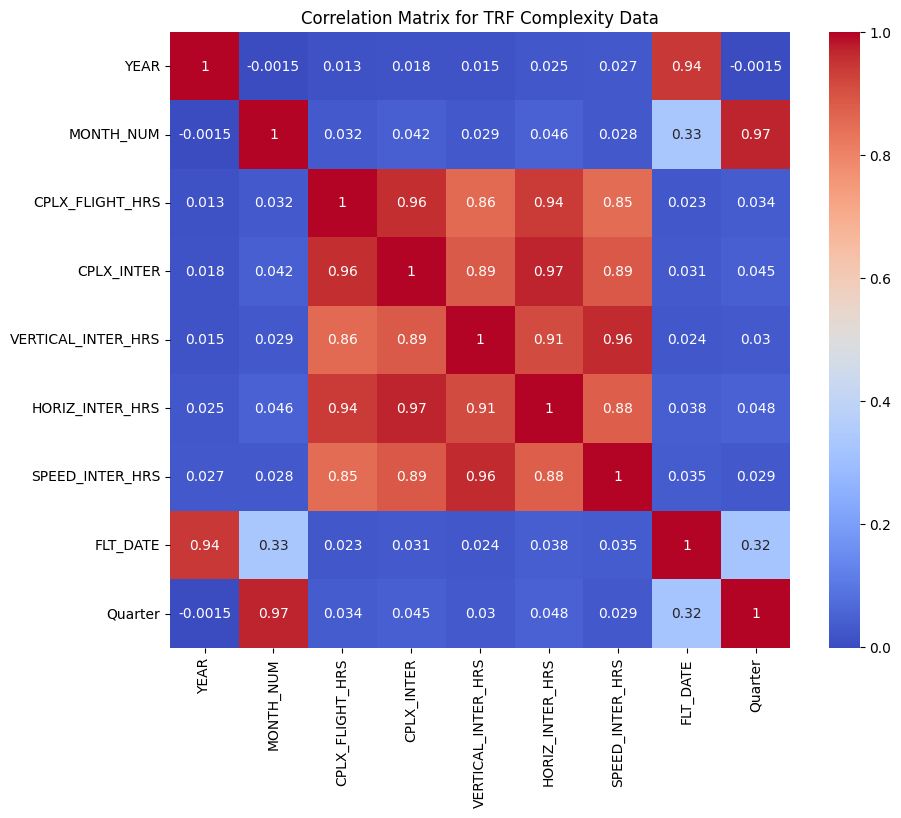

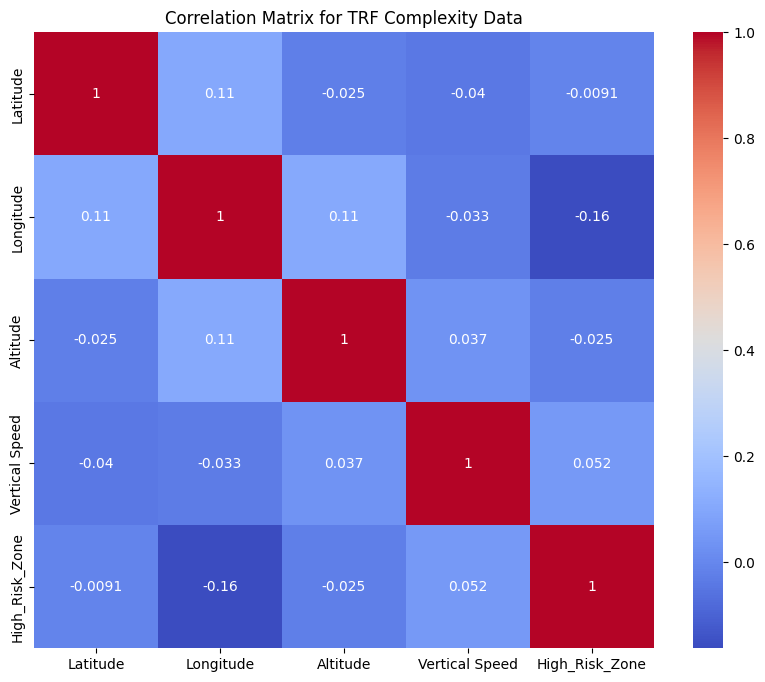

In [13]:
import numpy as np

# Ensure df_acas contains only numeric columns for correlation calculation
numeric_df_acas = df_acas.select_dtypes(include=[np.number])

#  Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_trfcomplexity.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for TRF Complexity Data')
plt.show()

#  Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df_acas.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for TRF Complexity Data')
plt.show()

# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # Ensure df_acas contains only numeric columns for correlation calculation
# numeric_df_acas = df_acas.select_dtypes(include=[np.number])

# # Correlation Matrix for TRF Complexity Data
# plt.figure(figsize=(10, 8))
# sns.heatmap(df_trfcomplexity.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix for TRF Complexity Data')
# plt.show()

# # Correlation Matrix for ACAS Data - Using numeric_df_acas which contains only numeric columns
# plt.figure(figsize=(10, 8))
# sns.heatmap(numeric_df_acas.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix for ACAS Data')
# plt.show()


In [12]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns



# # Verify column names and adjust if necessary
# print("TRF Complexity Columns:", df_trfcomplexity.columns)
# print("ACAS Columns:", df_acas.columns)

# # Feature Engineering

# ## Time Features for TRF Complexity Dataset
# df_trfcomplexity['FLT_DATE'] = pd.to_datetime(df_trfcomplexity['FLT_DATE'])
# df_trfcomplexity['Quarter'] = df_trfcomplexity['FLT_DATE'].dt.quarter

# #'Year-Month' exists or using an alternative column in ACAS Dataset
# # Check if 'Year-Month' exists, otherwise adjust accordingly
# if 'Year-Month' in df_acas.columns:
#     df_acas['Quarter'] = pd.to_datetime(df_acas['Year-Month'], format='%Y-%m').dt.quarter
# else:
#     # Placeholder: Adjust this part based on the actual column you want to use
#     print("'Year-Month' column not found in ACAS dataset. Please adjust the column reference.")

# ## Risk Zones in ACAS Dataset
# high_risk_zone_bounds = {'lat_min': 30, 'lat_max': 40, 'long_min': -100, 'long_max': -90}
# df_acas['High_Risk_Zone'] = ((df_acas['Latitude'].astype(float) >= high_risk_zone_bounds['lat_min']) & 
#                              (df_acas['Latitude'].astype(float) <= high_risk_zone_bounds['lat_max']) &
#                              (df_acas['Longitude'].astype(float) >= high_risk_zone_bounds['long_min']) & 
#                              (df_acas['Longitude'].astype(float) <= high_risk_zone_bounds['long_max'])).astype(int)

# ## Flight Condition Categories in ACAS Dataset
# df_acas['Altitude'] = pd.to_numeric(df_acas['Altitude'], errors='coerce')
# df_acas['Vertical Speed'] = pd.to_numeric(df_acas['Vertical Speed'], errors='coerce')
# df_acas['Altitude_Category'] = pd.cut(df_acas['Altitude'], bins=[0, 5000, 10000, 15000, df_acas['Altitude'].max()],
#                                       labels=['Low', 'Medium', 'High', 'Very High'], include_lowest=True)
# df_acas['Vertical_Speed_Category'] = pd.cut(df_acas['Vertical Speed'], bins=[df_acas['Vertical Speed'].min(), -500, 500, df_acas['Vertical Speed'].max()],
#                                             labels=['Rapid Descent', 'Stable', 'Rapid Ascent'], include_lowest=True)

# Proceed with further analysis or visualization...


TRF Complexity Columns: Index(['YEAR', 'MONTH_NUM', 'CPLX_FLIGHT_HRS', 'CPLX_INTER',
       'VERTICAL_INTER_HRS', 'HORIZ_INTER_HRS', 'SPEED_INTER_HRS', 'FLT_DATE',
       'Quarter'],
      dtype='object')
ACAS Columns: Index(['Latitude', 'Longitude', 'Altitude', 'Vertical Speed', 'MTE_Value',
       'RA'],
      dtype='object')
'Year-Month' column not found in ACAS dataset. Please adjust the column reference.


TRF Complexity Data after adding 'Quarter':
   YEAR  MONTH_NUM  CPLX_FLIGHT_HRS  CPLX_INTER  VERTICAL_INTER_HRS  \
0  2014          1       343.765833   42.295833            4.550000   
1  2014          1        30.133333    1.040833            0.028333   
2  2014          1        61.370000    3.780000            0.102500   
3  2014          1       342.625000   30.108333            4.885833   
4  2014          1       395.532500   11.073333            2.756667   

   HORIZ_INTER_HRS  SPEED_INTER_HRS   FLT_DATE  Quarter  
0        20.610000         6.075000 2014-01-01        1  
1         0.353333         0.116667 2014-01-01        1  
2         1.278333         0.119167 2014-01-01        1  
3        16.687500         6.057500 2014-01-01        1  
4         5.279167         2.238333 2014-01-01        1  

ACAS Data after defining 'High_Risk_Zone':
    Latitude   Longitude  Altitude  Vertical Speed    MTE_Value  \
0  34.045886 -117.757931    5550.0          2880.0    34.045886   
1  

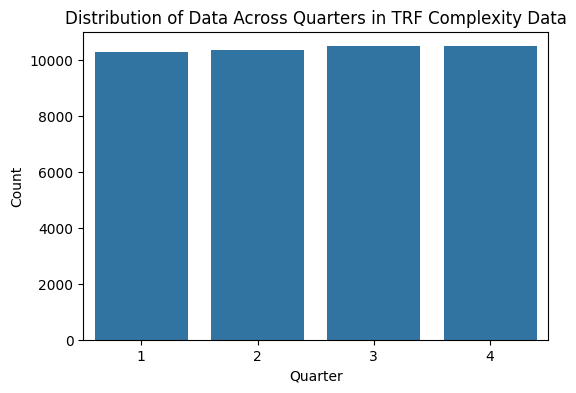

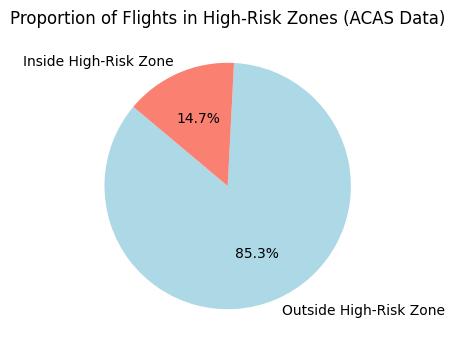

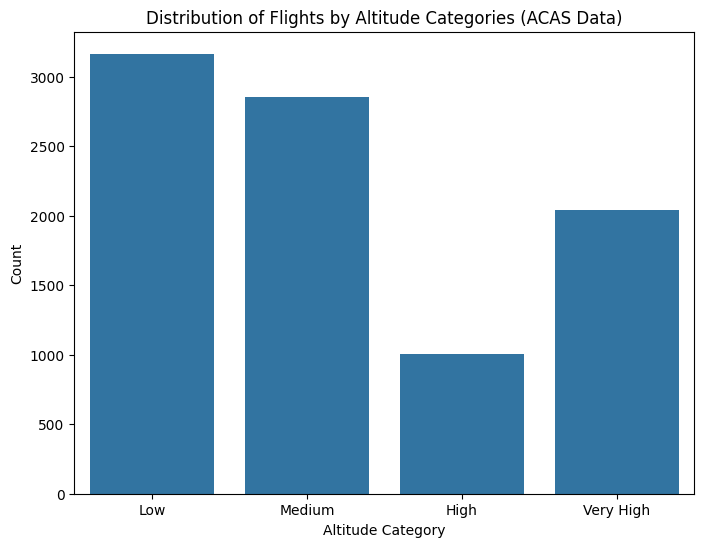

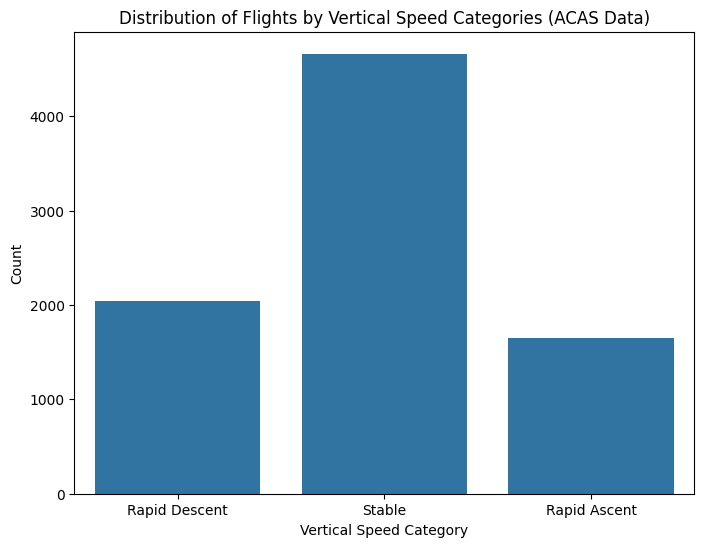

In [19]:
import pandas as pd


# Feature Engineering for df_trfcomplexity (Time Features already handled with 'Quarter')
# Feature Engineering for df_trfcomplexity
df_trfcomplexity['FLT_DATE'] = pd.to_datetime(df_trfcomplexity['FLT_DATE'])
df_trfcomplexity['Quarter'] = df_trfcomplexity['FLT_DATE'].dt.quarter
print("TRF Complexity Data after adding 'Quarter':")
print(df_trfcomplexity.head())

## Risk Zones for df_acas
high_risk_zone_bounds = {'lat_min': 30, 'lat_max': 40, 'long_min': -100, 'long_max': -90}
df_acas['High_Risk_Zone'] = ((df_acas['Latitude'].astype(float) >= high_risk_zone_bounds['lat_min']) & 
                             (df_acas['Latitude'].astype(float) <= high_risk_zone_bounds['lat_max']) &
                             (df_acas['Longitude'].astype(float) >= high_risk_zone_bounds['long_min']) & 
                             (df_acas['Longitude'].astype(float) <= high_risk_zone_bounds['long_max'])).astype(int)

print("\nACAS Data after defining 'High_Risk_Zone':")
print(df_acas.head())

## Flight Condition Categories for df_acas
df_acas['Altitude'] = pd.to_numeric(df_acas['Altitude'], errors='coerce')
df_acas['Vertical Speed'] = pd.to_numeric(df_acas['Vertical Speed'], errors='coerce')

df_acas['Altitude_Category'] = pd.cut(df_acas['Altitude'], bins=[0, 5000, 10000, 15000, df_acas['Altitude'].max()],
                                      labels=['Low', 'Medium', 'High', 'Very High'], include_lowest=True)

df_acas['Vertical_Speed_Category'] = pd.cut(df_acas['Vertical Speed'], bins=[df_acas['Vertical Speed'].min(), -500, 500, df_acas['Vertical Speed'].max()],
                                            labels=['Rapid Descent', 'Stable', 'Rapid Ascent'], include_lowest=True)

print("\nACAS Data after categorizing 'Altitude' and 'Vertical Speed':")
print(df_acas.head())


# Distribution of data across quarters in TRF Complexity Data
plt.figure(figsize=(6, 4))
sns.countplot(x='Quarter', data=df_trfcomplexity)
plt.title('Distribution of Data Across Quarters in TRF Complexity Data')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.show()


# Proportion of flights in High-Risk Zones in ACAS Data
high_risk_zone_counts = df_acas['High_Risk_Zone'].value_counts()
plt.figure(figsize=(6, 4))
high_risk_zone_counts.plot.pie(autopct='%1.1f%%', startangle=140, labels=['Outside High-Risk Zone', 'Inside High-Risk Zone'], colors=['lightblue', 'salmon'])
plt.title('Proportion of Flights in High-Risk Zones (ACAS Data)')
plt.ylabel('')  # Remove the y-label as it's not needed for pie chart
plt.show()

# Altitude Categories in ACAS Data
plt.figure(figsize=(8, 6))
sns.countplot(x='Altitude_Category', data=df_acas, order=['Low', 'Medium', 'High', 'Very High'])
plt.title('Distribution of Flights by Altitude Categories (ACAS Data)')
plt.xlabel('Altitude Category')
plt.ylabel('Count')
plt.show()

# Vertical Speed Categories in ACAS Data
plt.figure(figsize=(8, 6))
sns.countplot(x='Vertical_Speed_Category', data=df_acas, order=['Rapid Descent', 'Stable', 'Rapid Ascent'])
plt.title('Distribution of Flights by Vertical Speed Categories (ACAS Data)')
plt.xlabel('Vertical Speed Category')
plt.ylabel('Count')
plt.show()